# Data Loading and Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
df.head(5)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
df.shape

(48204, 9)

In [6]:
categorial_cols = df.select_dtypes(exclude="number")
numerical_cols = df.select_dtypes(include="number")

In [7]:
numerical_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00


In [8]:
categorial_cols.describe().T

,count,unique,top,freq
holiday,61,11,Labor Day,7
weather_main,48204,11,Clouds,15164
weather_description,48204,38,sky is clear,11665
date_time,48204,40575,19-05-2013 10:00,6


# Data Cleaning

Converting Tempreture to Celsius

In [9]:
df['temp'] = df['temp'] - 273
df['temp']

0        15.28
1        16.36
2        16.58
3        17.13
4        18.14
         ...  
48199    10.45
48200     9.76
48201     9.73
48202     9.09
48203     9.12
Name: temp, Length: 48204, dtype: float64

In [10]:
df['holiday'] = df['holiday'].fillna("None")

In [11]:
df.isna().sum()

traffic_volume         0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(17)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df['weather_description']=df['weather_description'].str.title()

# EDA

<Axes: >

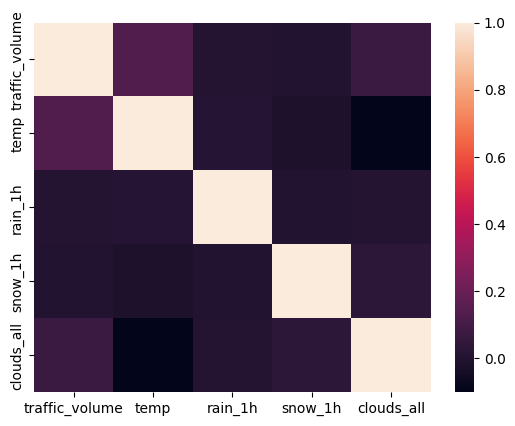

In [15]:
sns.heatmap(numerical_cols.corr())

In [16]:
holidays_df = df.loc[df['holiday'] != 'None']
holidays_df

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
126,455,Columbus Day,0.080,0.00,0.0,20,Clouds,Few Clouds,08-10-2012 00:00
1123,1000,Veterans Day,15.120,0.00,0.0,87,Clear,Sky Is Clear,12-11-2012 00:00
1370,919,Thanksgiving Day,5.540,0.00,0.0,20,Mist,Mist,22-11-2012 00:00
2360,803,Christmas Day,-8.600,0.00,0.0,90,Clouds,Overcast Clouds,25-12-2012 00:00
2559,1439,New Years Day,-9.510,0.00,0.0,58,Clouds,Broken Clouds,01-01-2013 00:00
...,...,...,...,...,...,...,...,...,...
44441,1088,Memorial Day,26.487,0.00,0.0,24,Clouds,Few Clouds,28-05-2018 00:00
45547,1021,Independence Day,24.550,0.00,0.0,1,Mist,Mist,04-07-2018 00:00
46936,596,State Fair,16.020,0.00,0.0,1,Clear,Sky Is Clear,23-08-2018 00:00
47330,962,Labor Day,19.430,0.25,0.0,1,Rain,Light Rain,03-09-2018 00:00


In [17]:
holidays_df['holiday']

126          Columbus Day
1123         Veterans Day
1370     Thanksgiving Day
2360        Christmas Day
2559        New Years Day
               ...       
44441        Memorial Day
45547    Independence Day
46936          State Fair
47330           Labor Day
47331           Labor Day
Name: holiday, Length: 61, dtype: object

dropping extreme values (outliers)

In [18]:
df.loc[df['temp'] < -50]

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
11898,361,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,31-01-2014 03:00
11899,734,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,31-01-2014 04:00
11900,2557,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,31-01-2014 05:00
11901,5150,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,31-01-2014 06:00
11946,291,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 03:00
11947,284,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 04:00
11948,434,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 05:00
11949,739,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 06:00
11950,962,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 07:00
11951,1670,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 08:00


In [19]:
df = df.loc[df['temp'] > -50]


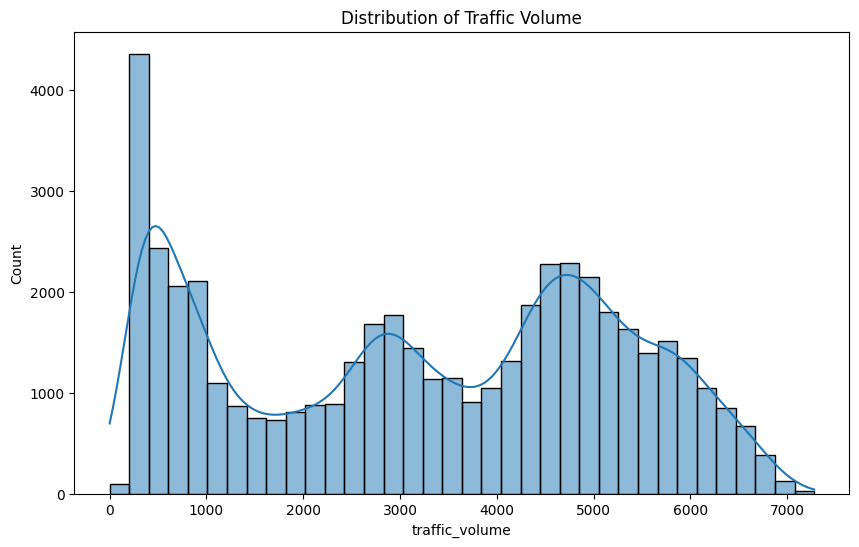

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

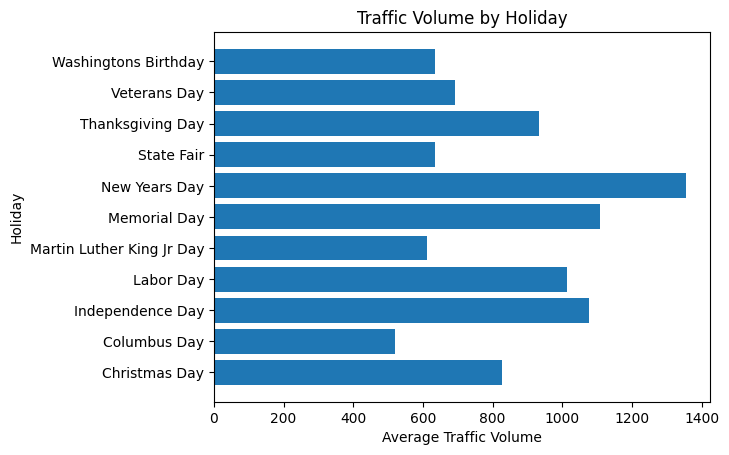

In [21]:
holiday_avg = holidays_df.groupby('holiday')['traffic_volume'].mean()

plt.barh(holiday_avg.index, holiday_avg.values)
plt.xlabel("Average Traffic Volume")
plt.ylabel("Holiday")
plt.title("Traffic Volume by Holiday")
plt.show()


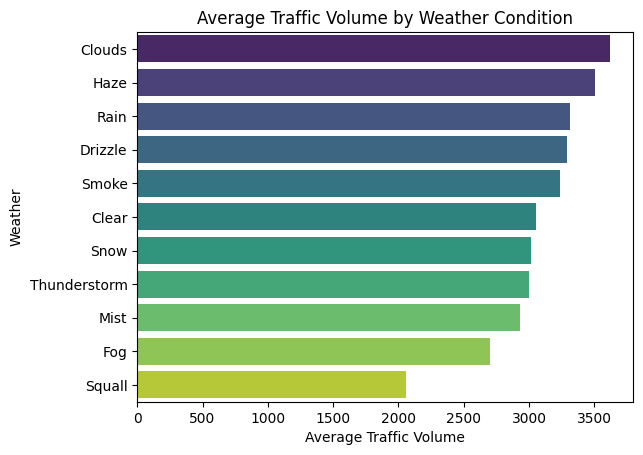

In [22]:
weather_avg = df.groupby('weather_main')['traffic_volume'].mean().reset_index()

# Sort for better readability
weather_avg = weather_avg.sort_values('traffic_volume', ascending=False)

# Plot
sns.barplot(data=weather_avg, x='traffic_volume', y='weather_main', palette='viridis')
plt.title("Average Traffic Volume by Weather Condition")
plt.xlabel("Average Traffic Volume")
plt.ylabel("Weather")
plt.show()

## Traffic Over Time

In [23]:
df['date_time'] = pd.to_datetime(df['date_time'], dayfirst=True)  # ensure datetime type

In [24]:
df_2015 = df.loc[df['date_time'].dt.year == 2015]

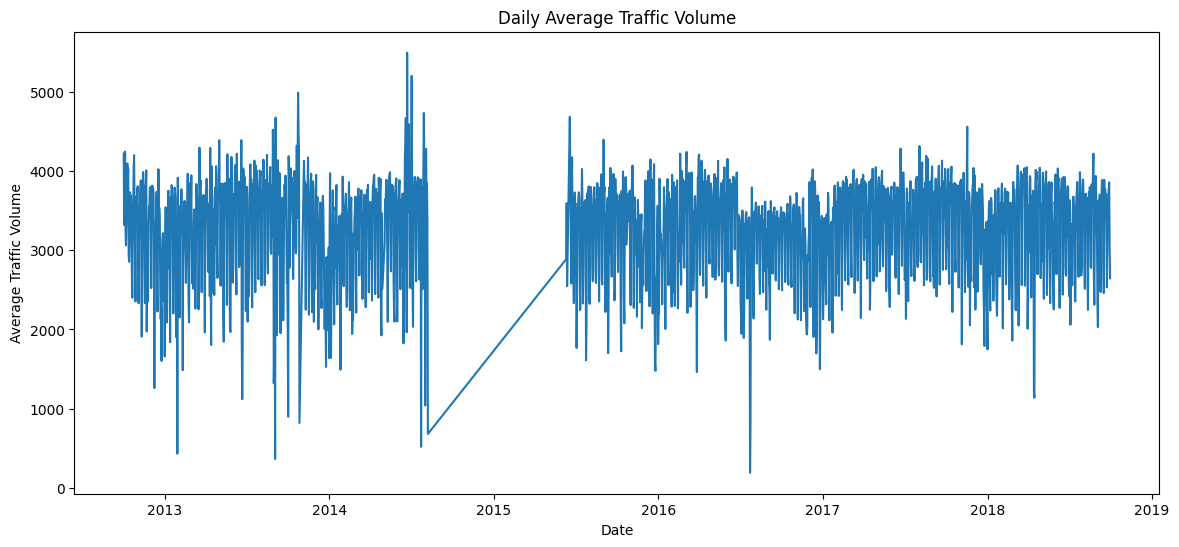

In [25]:
df.set_index('date_time', inplace=True)

daily_avg = df.resample('D')['traffic_volume'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_avg, x='date_time', y='traffic_volume')
plt.title("Daily Average Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Average Traffic Volume")
plt.show()

Inspecting The Gap

In [26]:
df_2014 = df[df.index.year == 2014]

df_2014.index.min(), df_2014.index.max(), len(df_2014)

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-08-08 01:00:00'), 4829)

In [27]:
df_2015['date_time'].min(), df_2015['date_time'].max(), len(df_2015)

(Timestamp('2015-06-11 20:00:00'), Timestamp('2015-12-31 23:00:00'), 4372)

`Data has got missing values between the 8th of August, 2014 and 11th of June, 2015.`

### Traffic's Peak Through the Day

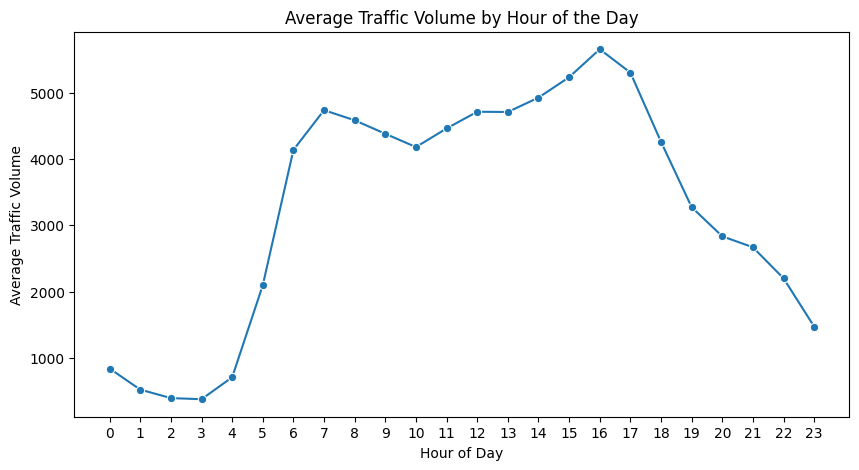

In [28]:
df['hour'] = df.index.hour
hour_of_day_avg = df.groupby('hour')['traffic_volume'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hour_of_day_avg, x='hour', y='traffic_volume', marker='o')
plt.title("Average Traffic Volume by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Traffic Volume")
plt.xticks(range(0, 24))
plt.show()


# Modeling

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def print_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        print("Train Result:\n================================================")
    else:
        pred = model.predict(X_test)
        print("Test Result:\n================================================")
    
    mae = mean_absolute_error(y_train if train else y_test, pred)
    mse = mean_squared_error(y_train if train else y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train if train else y_test, pred)

    results = pd.DataFrame({
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "R²": [r2]
    })

    print(results.to_string(index=False))
    print("================================================\n")


## Preprocessing

In [30]:
df = df.reset_index()  # brings date_time back as a column

df['date_time'] = pd.to_datetime(df['date_time'])

# Extract features from 'date_time'
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

In [31]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorial_cols)
    ])

In [32]:
X = df.drop(columns='traffic_volume')
y = df['traffic_volume']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class DateTimeExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, datetime_col):
        self.datetime_col = datetime_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.datetime_col] = pd.to_datetime(X_copy[self.datetime_col])
        return pd.DataFrame({
            'hour': X_copy[self.datetime_col].dt.hour,
            'day_of_week': X_copy[self.datetime_col].dt.dayofweek,
            'month': X_copy[self.datetime_col].dt.month
        })


In [35]:

# Original feature groups
num_features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
cat_features = ['holiday', 'weather_main', 'weather_description']

# Pipeline for numeric features
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for datetime feature
date_pipeline = Pipeline([
    ('extractor', DateTimeExtractor(datetime_col='date_time')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # hour, day_of_week, month → categorical
])

# Full preprocessor
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
    ('date', date_pipeline, ['date_time'])
])


## Baseline Model

In [383]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict mean value for all samples
baseline_prediction = np.full_like(y, y.mean())

# Evaluate baseline
mae = mean_absolute_error(y, baseline_prediction)
mse = mean_squared_error(y, baseline_prediction)
r2 = r2_score(y, baseline_prediction)

print(f"Baseline MAE: {mae:.2f}")
print(f"Baseline MSE: {mse:.2f}")
print(f"Baseline R²: {r2:.2f}")


Baseline MAE: 1745.01
Baseline MSE: 3947507.85
Baseline R²: -0.00


## Linear Regression

In [384]:
from sklearn.linear_model import LinearRegression

lr_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [385]:
lr_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'rain_1h', 'snow_1h',
                                                   'clouds_all']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['holiday', 'weather_main',
                                                   'weather_description']),
                                                 ('date',
                                                  Pipeline(steps=[('extractor',
                                                                   DateTimeExtractor(datetime_col='date_time')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['date_time'])])),
                ('regressor', LinearRegression())])

In [386]:
print_score(lr_reg,X_train,y_train, X_test,y_test, train= True)
print_score(lr_reg,X_train,y_train, X_test,y_test, train= False)

Train Result:
       MAE           MSE       RMSE       R²
586.751779 655872.736497 809.859702 0.833664

Test Result:
      MAE           MSE       RMSE       R²
588.00564 650692.222235 806.654959 0.835902



In [387]:
feature_names = preprocessor.get_feature_names_out()
coefficients = lr_reg.named_steps['regressor'].coef_

# Combine into DataFrame
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

# Exclude any features coming from date_time
coef_df = coef_df[~coef_df['feature'].str.contains('date_time', case=False)]

# Sort and plot
coef_df = coef_df.sort_values(by='coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='coefficient', y='feature')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()


AttributeError: Estimator extractor does not provide get_feature_names_out. Did you mean to call pipeline[:-1].get_feature_names_out()?

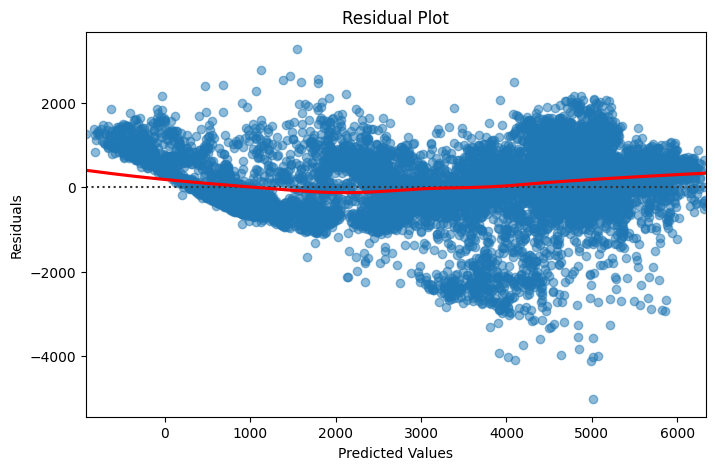

In [ ]:
y_pred = lr_reg.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True,
              scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

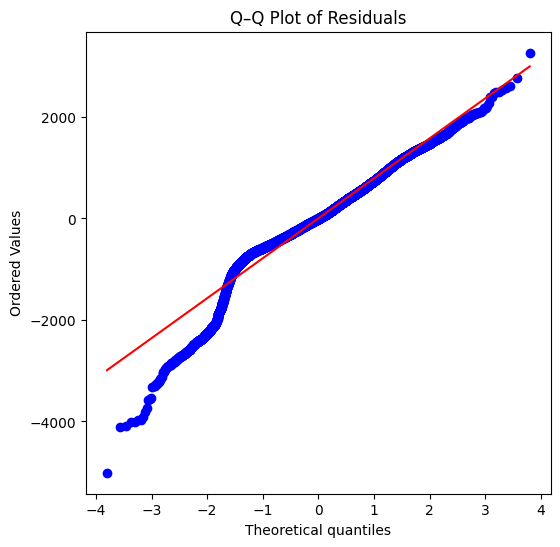

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency


# converting continuous target into categories (e.g., 3 bins)
df['traffic_category'] = pd.qcut(df['traffic_volume'], q=3, labels=['Low', 'Medium', 'High'])



for feature in categorial_cols:
    contingency = pd.crosstab(df[feature], df['traffic_category'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test for {feature} vs Traffic Category: p-value = {p:.4f}")

    alpha = 0.05
    if p <= alpha:
        print(f"Result: Significant association (p ≤ {alpha}) - REJECT null hypothesis")
    else:
        print(f"Result: No significant association (p > {alpha}) - FAIL TO REJECT null hypothesis")

    print("-" * 50)


Chi-square test for holiday vs Traffic Category: p-value = 0.0000
Result: Significant association (p ≤ 0.05) - REJECT null hypothesis
--------------------------------------------------
Chi-square test for weather_main vs Traffic Category: p-value = 0.0000
Result: Significant association (p ≤ 0.05) - REJECT null hypothesis
--------------------------------------------------
Chi-square test for weather_description vs Traffic Category: p-value = 0.0000
Result: Significant association (p ≤ 0.05) - REJECT null hypothesis
--------------------------------------------------
Chi-square test for date_time vs Traffic Category: p-value = 0.0000
Result: Significant association (p ≤ 0.05) - REJECT null hypothesis
--------------------------------------------------


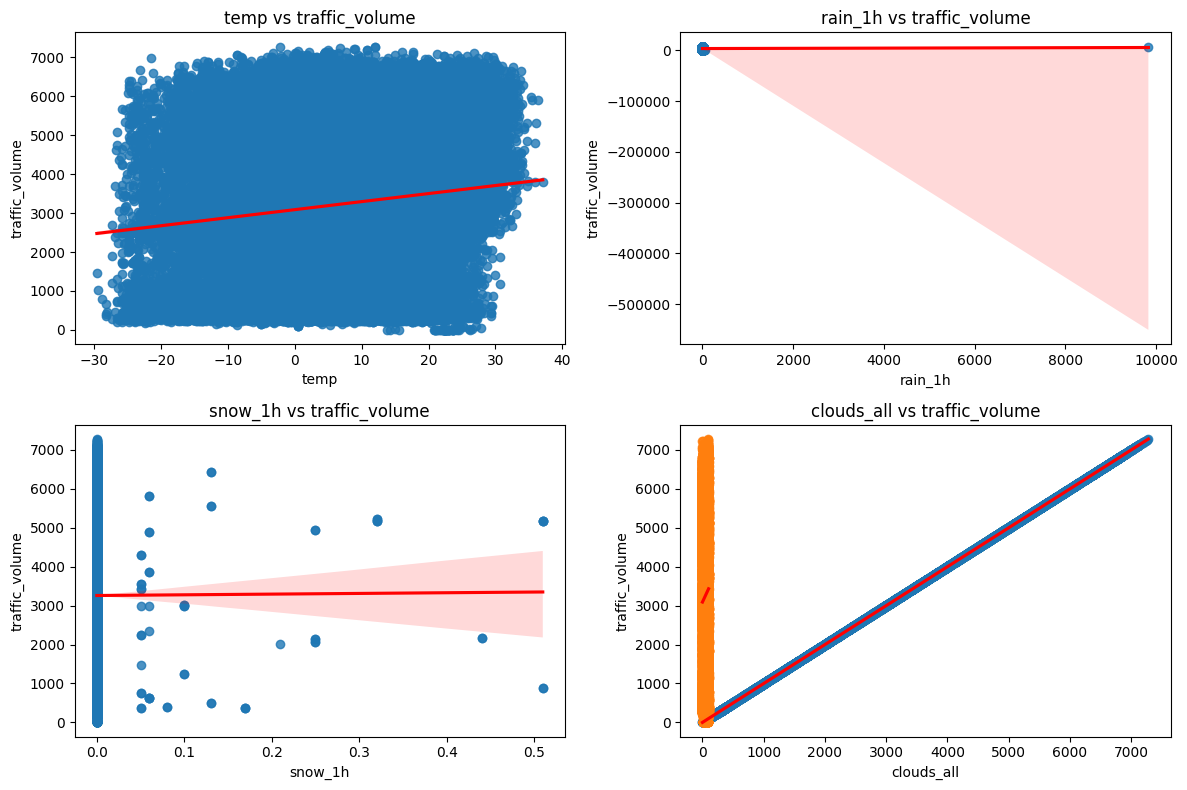

In [ ]:
# Example numeric features
target = 'traffic_volume'

# Create subplots
n_cols = 2
n_rows = (len(num_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(numerical_cols):
    sns.regplot(
        x=df[feature], 
        y=df[target],
        line_kws={'color': 'red'},
        ax=axes[i-1]
    )
    axes[i-1].set_title(f'{feature} vs {target}')

# Remove any empty subplots if number of features is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = make_pipeline(OneHotEncoder(), RandomForestRegressor())

reg_rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [43]:
# Ensure X_train is DataFrame
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)

# Detect column types
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorial_cols)
    ],
    remainder='drop'  # Drop anything unexpected
)

# Full pipeline
reg_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit
reg_rf.fit(X_train, y_train)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Function to extract datetime features
def extract_datetime_features(df):
    df = df.copy()
    df['year'] = df['date_time'].dt.year
    df['month'] = df['date_time'].dt.month
    df['day'] = df['date_time'].dt.day
    df['hour'] = df['date_time'].dt.hour
    df = df.drop(columns=['date_time'])  # drop original
    return df

# Pipeline step to transform datetime
datetime_transformer = FunctionTransformer(extract_datetime_features)

# Detect categorical & numeric columns *after* datetime processing
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Full pipeline
reg_rf = Pipeline(steps=[
    ('datetime', datetime_transformer),
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit model
reg_rf.fit(X_train, y_train)


KeyboardInterrupt: 

In [502]:
reg_rf.predict(X_test)

ValueError: Found unknown categories [np.float64(-26.349999999999994), np.float64(-26.319999999999993), np.float64(-26.25999999999999), np.float64(-25.919999999999987), np.float64(-25.870000000000005), np.float64(-25.74000000000001), np.float64(-25.72999999999999), np.float64(-25.710000000000008), np.float64(-25.650000000000006), np.float64(-25.569999999999993), np.float64(-25.560000000000002), np.float64(-25.52000000000001), np.float64(-25.099999999999994), np.float64(-24.97999999999999), np.float64(-24.830000000000013), np.float64(-24.569999999999993), np.float64(-24.110000000000014), np.float64(-24.099999999999994), np.float64(-24.090000000000003), np.float64(-23.930000000000007), np.float64(-23.669999999999987), np.float64(-23.159999999999997), np.float64(-23.129999999999995), np.float64(-23.05000000000001), np.float64(-22.99000000000001), np.float64(-22.900000000000006), np.float64(-22.72), np.float64(-22.460000000000008), np.float64(-22.44999999999999), np.float64(-22.439999999999998), np.float64(-21.97999999999999), np.float64(-21.870000000000005), np.float64(-21.789999999999992), np.float64(-21.669999999999987), np.float64(-21.330000000000013), np.float64(-21.180000000000007), np.float64(-21.00999999999999), np.float64(-20.599999999999994), np.float64(-20.189999999999998), np.float64(-20.150000000000006), np.float64(-20.069999999999993), np.float64(-20.02000000000001), np.float64(-19.819999999999993), np.float64(-19.580000000000013), np.float64(-19.340000000000003), np.float64(-18.569999999999993), np.float64(-18.55000000000001), np.float64(-18.53), np.float64(-18.319999999999993), np.float64(-18.080000000000013), np.float64(-17.889999999999986), np.float64(-17.74000000000001), np.float64(-17.50999999999999), np.float64(-17.439999999999998), np.float64(-16.930000000000007), np.float64(-16.819999999999993), np.float64(-16.589999999999975), np.float64(-16.269999999999982), np.float64(-16.149999999999977), np.float64(-15.769999999999982), np.float64(-15.45999999999998), np.float64(-15.399999999999977), np.float64(-15.329999999999984), np.float64(-14.529999999999973), np.float64(-13.889999999999986), np.float64(-13.45999999999998), np.float64(-13.370000000000005), np.float64(-13.300000000000011), np.float64(-13.149999999999977), np.float64(-13.04000000000002), np.float64(-13.009999999999991), np.float64(-12.029999999999973), np.float64(-11.829999999999984), np.float64(-11.259999999999991), np.float64(-10.759999999999991), np.float64(-10.360000000000014), np.float64(-9.899999999999977), np.float64(-9.639999999999986), np.float64(-9.480000000000018), np.float64(-9.259999999999991), np.float64(-9.009999999999991), np.float64(-8.259999999999991), np.float64(-7.8700000000000045), np.float64(-7.2900000000000205), np.float64(-6.769999999999982), np.float64(-5.300000000000011), np.float64(-5.214999999999975), np.float64(-3.670000000000016), np.float64(-3.6680000000000064), np.float64(-1.8220000000000027), np.float64(-1.009999999999991), np.float64(-0.8000000000000114), np.float64(0.10000000000002274), np.float64(0.6000000000000227), np.float64(1.6399999999999864), np.float64(4.196000000000026), np.float64(4.25), np.float64(6.1200000000000045), np.float64(6.490000000000009), np.float64(7.0400000000000205), np.float64(7.970000000000027), np.float64(8.021999999999991), np.float64(8.339999999999975), np.float64(9.100000000000023), np.float64(9.552000000000021), np.float64(9.73599999999999), np.float64(10.050000000000011), np.float64(10.168000000000006), np.float64(10.180000000000007), np.float64(10.189999999999998), np.float64(10.730000000000018), np.float64(13.583000000000027), np.float64(13.62299999999999), np.float64(14.586000000000013), np.float64(15.093000000000018), np.float64(17.836000000000013), np.float64(18.09699999999998), np.float64(19.612000000000023), np.float64(19.89100000000002), np.float64(20.51400000000001), np.float64(24.543000000000006), np.float64(29.029999999999973), np.float64(29.139999999999986), np.float64(29.160000000000025), np.float64(29.389999999999986), np.float64(29.44999999999999), np.float64(29.480000000000018), np.float64(29.670000000000016), np.float64(29.70999999999998), np.float64(29.860000000000014), np.float64(30.430000000000007), np.float64(30.600000000000023), np.float64(30.639999999999986), np.float64(30.730000000000018), np.float64(30.860000000000014), np.float64(30.920000000000016), np.float64(31.560000000000002), np.float64(31.600000000000023), np.float64(31.620000000000005), np.float64(31.689999999999998), np.float64(31.75), np.float64(31.80000000000001), np.float64(31.829999999999984), np.float64(31.899999999999977), np.float64(32.06999999999999), np.float64(32.25), np.float64(32.29000000000002), np.float64(32.339999999999975), np.float64(32.51999999999998), np.float64(32.55000000000001), np.float64(32.68000000000001), np.float64(32.69), np.float64(32.93000000000001), np.float64(33.25), np.float64(33.329999999999984), np.float64(33.579999999999984), np.float64(33.660000000000025), np.float64(34.089999999999975), np.float64(34.660000000000025), np.float64(34.68000000000001), np.float64(35.94999999999999), np.float64(36.079999999999984)] in column 1 during transform

In [ ]:
print_score(regr, X_train, y_train, X_test, y_test, train=False)

TypeError: float() argument must be a string or a real number, not 'Timestamp'